In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime

In [51]:
ks = pd.read_csv('ks-projects-201801.csv')

In [52]:
ks.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [53]:
tec = ks[ks['main_category'] == 'Technology']
tec.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
65,1000245024,Safer Home,Hardware,Technology,CAD,2015-07-03,50000.0,2015-06-03 05:52:43,0.0,failed,0,CA,0.00,0.00,39739.31
67,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.0,failed,0,GB,0.00,0.00,2579.35
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.0,canceled,15,US,2030.00,2030.00,87000.00
71,1000261018,Diposta - liberating people from their postal ...,Web,Technology,USD,2016-08-23,100000.0,2016-07-24 13:18:36,141.0,failed,3,US,100.00,141.00,100000.00
98,100039820,Best Spray Bottle Ever - SureShot,Gadgets,Technology,CAD,2015-03-07,25000.0,2015-02-05 16:57:21,3.0,failed,3,CA,2.41,2.36,19632.48


In [54]:
tecl = tec['launched'].astype('datetime64[ns]').dt.date
tecl

65        2015-06-03
67        2017-06-02
70        2016-02-29
71        2016-07-24
98        2015-02-05
             ...    
378591    2015-11-10
378611    2016-11-08
378643    2014-05-05
378650    2016-07-29
378659    2016-01-13
Name: launched, Length: 32569, dtype: object

In [55]:
tecd = tec['deadline'].astype('datetime64[ns]').dt.date
tecd

65        2015-07-03
67        2017-07-02
70        2016-03-25
71        2016-08-23
98        2015-03-07
             ...    
378591    2015-12-10
378611    2017-01-07
378643    2014-05-26
378650    2016-09-05
378659    2016-02-13
Name: deadline, Length: 32569, dtype: object

In [62]:

df3 = pd.DataFrame({'backers':tec['backers'],'Duration': (abs(tecd-tecl)).dt.days})
df3.head

<bound method NDFrame.head of         backers  Duration
65            0        30
67            0        30
70           15        25
71            3        30
98            3        30
...         ...       ...
378591        0        30
378611        2        60
378643        0        21
378650        0        38
378659        6        31

[32569 rows x 2 columns]>

In [ ]:
sns_plot = sns.jointplot(data=df3, x='backers', y='Duration', kind='kde')
sns_plot.savefig("output.png")

In [ ]:
ks['launched'] = pd.to_datetime(ks.launched)

In [60]:
#tec['duration'] = df3['Duration']
#tec.head()

In [24]:
ks['deadline'] = pd.to_datetime(ks.deadline)

In [9]:
print(type(ks['launched']))

<class 'pandas.core.series.Series'>


In [10]:
#art.describe()

In [25]:
df = pd.DataFrame({'Duration': (abs(ks.deadline-ks.launched))})
df.head

<bound method NDFrame.head of                Duration
0      58 days 11:47:32
1      59 days 19:16:03
2      44 days 23:39:10
3      29 days 20:35:49
4      55 days 15:24:57
...                 ...
378656 29 days 21:24:30
378657 26 days 20:24:46
378658 45 days 04:19:30
378659 30 days 05:46:07
378660 27 days 14:52:13

[378661 rows x 1 columns]>

In [39]:
print(type(df['Duration'][0]))

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [30]:
#ks['Duration'] = df['Duration']
#ks.head


<bound method NDFrame.head of                 ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency   deadline     goal  \
0                Poetry

In [31]:
art = ks[ks['main_category'] == 'Art']
com = ks[ks['main_category'] == 'Comics']
craf = ks[ks['main_category'] == 'Crafts']
dan = ks[ks['main_category'] == 'Dance']
des = ks[ks['main_category'] == 'Design']
fas = ks[ks['main_category'] == 'Fashion']
fiv = ks[ks['main_category'] == 'Film & Video']
food = ks[ks['main_category'] == 'Food']
gam = ks[ks['main_category'] == 'Games']
jou = ks[ks['main_category'] == 'Journalism']
mus = ks[ks['main_category'] == 'Music']
pho = ks[ks['main_category'] == 'Photography']
pub = ks[ks['main_category'] == 'Publishing']

the = ks[ks['main_category'] == 'Theatre']

In [13]:
#ks1 = ks.sort_values('launched')

plot the length of thing against the number of pledges ?

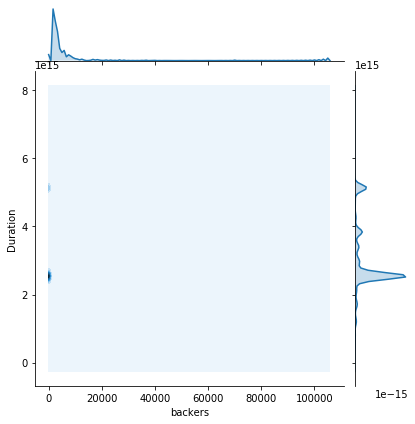

In [33]:
sns_plot = sns.jointplot(data=tec, x='backers', y='Duration', kind='kde')
sns_plot.savefig("output.png")
